# **TensorFlow Guide**

**Author: James Bustos**

**Sources used**:
- [TensorFlow Guide](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb)



## **Introduction to TensorFlow**

* **What is TensorFlow?**
  * TensorFlow is a powerful open-source software library for machine learning developed by Google. It's used for a wide range of tasks but has a particular focus on training and inference of deep neural networks.
* **Applications in Image and Video Processing**
  * TensorFlow excels in handling image and video data, making it an excellent choice for projects involving object detection, image classification, and even generative models. These capabilities are critical for developing systems that can "see" and interpret the world around them.
* **Significance for Sign Language Recognition**
  * For sign language recognition, TensorFlow's ability to process and learn from video and image data can be leveraged to train models that accurately recognize sign language gestures.

## **Set up Tensorflow**




If you are in your own development environment you would typically install Tensorflow using `pip install`, however, TensorFlow comes installed by default on colab, so we can skip this step.

In [ ]:
# !pip install tensorflow – Not needed for colab since it comes by default

To get started with TensorFlow we must first import it into our script

In [ ]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.15.0


## **Load a dataset**

Let's begin by loading a prebuilt dataset. Keras, a high-level neural network API within TensorFlow, facilitates the development and training of deep learning models. It also provides a collection of easily accessible benchmark datasets. For this guide, we will utilize the MNIST dataset, known for its use in handwritten digit recognition tasks. This example will demonstrate how straightforward it is to get started with deep learning projects using TensorFlow and Keras.

![mnist](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png)


## **Preparing the MNIST Dataset**

The MNIST dataset, containing 60,000 training images and 10,000 testing images of handwritten digits, is key for learning image processing. Each 28x28 pixel image is grayscale, representing digits from 0 to 9. To use this dataset in TensorFlow:

1. **Load the Dataset:**\
First, we load the dataset into our project using:
```
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```
This line loads the dataset and performs a train-test split, a critical practice to prevent overfitting and ensure model generalization. The train-test split divides the dataset into two parts: one for training the model to learn patterns and the other for testing to evaluate how well it generalizes to unseen data. Each image in the dataset comes with its own label, indicating the digit it represents, which is crucial for supervised learning tasks where the model learns to associate images with their corresponding labels.

1. **Normalize the Data:**\
The pixel values range from 0 to 255. For optimal neural network performance, we scale these values to a range of 0 to 1 by dividing by 255.0. This normalization step converts the samples from integers to floating-point numbers, facilitating the training process due to smaller, standardized inputs.
```
train_images, test_images = train_images / 255.0, test_images / 255.0
```

By following these steps, we've successfully loaded and prepraed our dataset for training a neural netowrk model. This process ensures the model learns efficiently from normalized data, enhancing its ability to recognize and classify unseen handwritten digits accurately.

In [ ]:
# Prepare data for use
mnist = tf.keras.datasets.mnist

# Load data into memory
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train-test split
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


## **Visualizing the MNIST Dataset**

To better understand our data, let's visualize one of the images from the training set along with its corresponding label. This will give us a clearer picture of what our model is learning from.

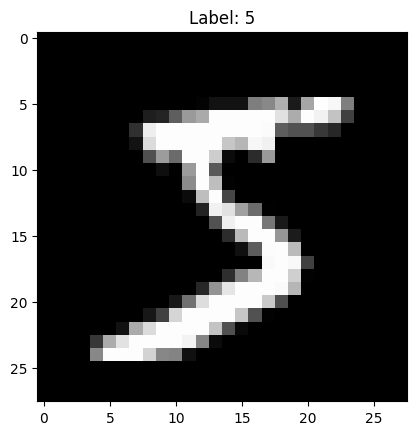

In [ ]:
import matplotlib.pyplot as plt

# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()


## **Build a machine learning model**

Building a machine learning model with TensorFlow and Keras involves defining the model's architecture and specifying how it should learn from the data. Here's a step-by-step explanation:

1. **Sequential Model:**
```
model = tf.keras.models.Sequential([
```
A `Sequential` model in Keras is a linear stack of layers, forming the simplest type of model for processing data. Here, data flows through layers in a straightforward sequence, without looping back. In this model, each layer receives an input tensor from the previous layer, performs operations, and produces an output tensor for the next layer. This way, the model transforms the input data step-by-step until it reaches the final output layer.

  A **tensor** is essentially a container for data (numerical data), it's a generalization of scalars, vectors, and matrices to potentially higher dimensions.

1. **Flatten Layer:**
```
tf.keras.layers.Flatten(input_shape=(28, 28)),
```
The first layer in your model is a `Flatten` layer, which transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data. The `input_shape` argument specifies the shape of the input data which, in this case, is a 28x28 pixel image.

1. **Dense Layer with ReLU Activation:**
```
tf.keras.layers.Dense(128, activation='relu'),
```
After flattening the pixel values, the network consists of a sequence of two `Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The `activation` parameter specifies the activation function to use. Here, 'relu' stands for rectified linear unit, a function that allows the model to solve nonlinear problems.

1. **Dropout Layer:**
```
tf.keras.layers.Dropout(0.2),
```
The `Dropout` layer randomly sets input units to 0 with a frequency of 20% at each step during training, helping to prevent overfitting. This means that 20% of the randomly selected neurons are ignored during training, reducing the risk of overfitting by providing a form of regularization.

1. **Output Dense Layer:**
```
tf.keras.layers.Dense(10)
```
This final `Dense` layer consists of 10 nodes, each corresponding to one of the digit classes (0 through 9) the model identifies. It outputs logits, which are raw prediction scores indicating the model's confidence for each class. These logits can later be transformed into probabilities, offering a clearer interpretation of the model's predictions.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

## **Exploring Predictions**

Bfore compiling and training our model, it would be helpful to better understand how predictions work by exploring one input image. As stated, the model's final layer outputs logits, which are raw scores for each class. To understand these predictions:

1. **Make prediction:**
```
predictions = model(train_images[:1]).numpy()
```
Initially, we ask the model for its predictions on the first training image. The model returns logits, which are the raw scores from the final Dense layer for each class.

1. **Convert logits into probabilities:**
```
tf.nn.softmax(predictions).numpy()
```
To convert these logits into probabilities, we apply the softmax function. This step demonstrates how to interpret the final layer's logits as probabilities, showing the model's confidence across the classes.




In [ ]:
predictions = model(train_images[:1]).numpy()
predictions

array([[ 0.8211072 ,  0.462401  , -0.09026444,  1.3257906 , -0.1497691 ,
         0.23355341, -0.18482612,  0.41695774,  1.1724658 , -0.03064435]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.13205922, 0.09225387, 0.05308417, 0.21875095, 0.05001756,
        0.07338332, 0.04829447, 0.08815538, 0.18765573, 0.05634531]],
      dtype=float32)

## **Preparing for Training**

Before training, we must compile the model. This involves specifying the optimizer, loss function, and metrics to use:

1. **Optimizer**: The algorithm that adjusts the model's parameters based on the loss function's feedback to minimize errors during training. In this instace, we used 'Adaptive Moment Estimation' or 'adam' which is efficient with high accuracy.
1. **Loss Function**:
```
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
```
Meausres how well the model's predictions match the actual labels. `SparseCategoricalCrossentropy` is sufficient for multi-class classification problems like ours
1. **Metrics**: Used to monitor the training and testing steps. 'Accuracy' is a common metric for classification, indicating the percentage of correct predictions.

1. **Compiling the model**
```
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
```

This is essentially preparing the model with the necessary settings for when training begins.

In [ ]:
# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## **Train and Evaluate**

After setting up the model, the next steps are training it on the dataset and then evaluating its performance.

1. **Training the Model**:
```
model.fit(train_images, train_labels, epochs=5)
```
* `model.fit()` starts the training process. The model learns to associate the images (`train_images`) with the correct labels (`train_labels`).
* `epochs=5` An epoch is one complete presentation of data set to the model. In this instance, we specify 5 epochs, which means the model will see the entire dataset five times. With each epoch, the model adjusts its weight slightly to reduce the error in its predictions

2. **Evaluating the model**
```
model.evaluate(test_images, test_labels, verbose=2)
```
* `model.evaluate()`: After training, we evaluate the model's performance using a different dataset that it hasn't seen before (test_images and test_labels). This function tests the model's accuracy and gives us a sense of how well our model can generalize to new data.
* `verbose=2`: This parameter controls the detail of the output displayed during evaluation. A value of 2 shows progress bars and a summary of the losses and metrics for each epoch.

3. **Making Predictions with the Model**
```
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
```
* To use the model for making predictions, we often want the output to be more interpretable, such as providing probabilities that an image belongs to each of the possible classes. To achieve this, we create a new model that adds a softmax layer on top of our existing model.

* `tf.keras.Sequential()`: This command is used to stack the pre-trained model with a new layer.

* `model`: Our pre-trained model is added as the base.

* `tf.keras.layers.Softmax()`: A softmax layer is added on top. This layer converts the logits, or raw prediction scores, from our model into probabilities by applying the softmax function. Each score is transformed into a probability value, indicating the likelihood of the input belonging to one of the classes.



In [ ]:
# Train model
model.fit(train_images, train_labels, epochs=5)

# Evaluating the model
model.evaluate(test_images, test_labels, verbose=2)

# Making predictions with the model
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3058 - accuracy: 0.9112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9557
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1102 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0912 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9765
313/313 - 1s - loss: 0.0741 - accuracy: 0.9769 - 612ms/epoch - 2ms/step


## Visualizing Predictions

To further understand how our model performs, let's visualize its predictions on an image. We'll display an image from the test set, use our `probability_model` to predict the probabilities for each class, and then highlight the class with the highest probability along with its label.

1/1 [==============================] - 0s 55ms/step


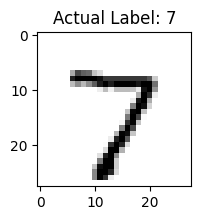

Predicted probabilities:
[[4.6812190e-08 2.7573621e-09 4.2093925e-06 5.6728040e-04 2.8949121e-11
  1.6476713e-07 2.7183915e-12 9.9942672e-01 4.5148173e-08 1.5781640e-06]]
Predicted Label: 7 with a probability of 1.00


In [ ]:
import numpy as np

# Selecting a sample image from the test set
sample_image = test_images[0]
sample_label = test_labels[0]

# Predicting the class probabilities for the selected image
predictions = probability_model.predict(test_images[:1])

# Visualizing the selected image
plt.figure(figsize=(2, 2))
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f"Actual Label: {sample_label}")
plt.show()

# Displaying the predicted probabilities for all classes
print("Predicted probabilities:")
print(predictions)

# Finding the class with the highest probability
predicted_label = np.argmax(predictions[0])
probability = np.max(predictions[0])

print(f"Predicted Label: {predicted_label} with a probability of {probability:.2f}")
